<a href="https://www.kaggle.com/code/chandruuk/house-rent-prediction?scriptVersionId=105390899" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-rent-prediction-dataset/Dataset Glossary.txt
/kaggle/input/house-rent-prediction-dataset/House_Rent_Dataset.csv


In [2]:
data=pd.read_csv("/kaggle/input/house-rent-prediction-dataset/House_Rent_Dataset.csv")
#datatxt=pd.read_csv("/kaggle/input/house-rent-prediction-dataset/Dataset Glossary.txt",sep=" ",header=None)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [4]:
data.head(10)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
5,2022-04-29,2,7000,600,Ground out of 1,Super Area,Thakurpukur,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
6,2022-06-21,2,10000,700,Ground out of 4,Super Area,Malancha,Kolkata,Unfurnished,Bachelors,2,Contact Agent
7,2022-06-21,1,5000,250,1 out of 2,Super Area,Malancha,Kolkata,Unfurnished,Bachelors,1,Contact Agent
8,2022-06-07,2,26000,800,1 out of 2,Carpet Area,"Palm Avenue Kolkata, Ballygunge",Kolkata,Unfurnished,Bachelors,2,Contact Agent
9,2022-06-20,2,10000,1000,1 out of 3,Carpet Area,Natunhat,Kolkata,Semi-Furnished,Bachelors/Family,2,Contact Owner


In [5]:
data.shape

(4746, 12)

In [6]:
data.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [7]:
data.duplicated().sum()

0

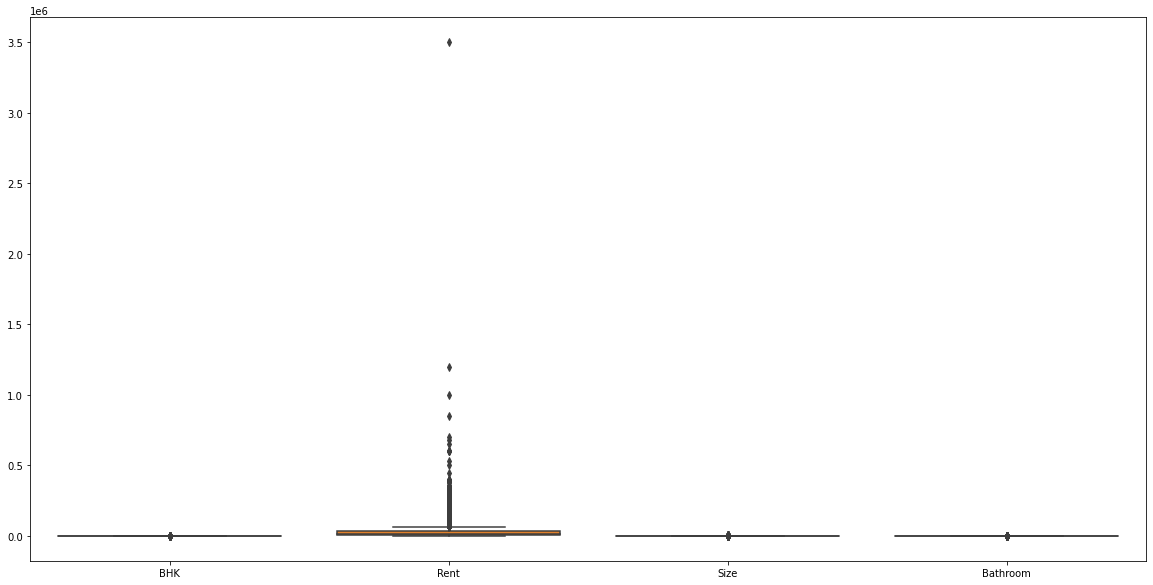

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10), facecolor='w')
sns.boxplot(data=data)
plt.show()

<AxesSubplot:>

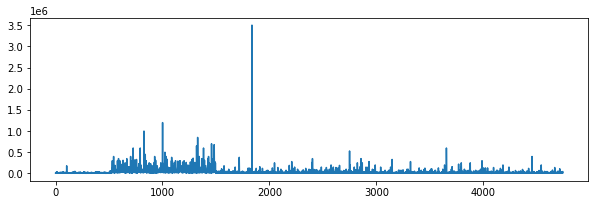

In [9]:
data.Rent.plot(kind="line",figsize=(10,3))

In [10]:
data.sort_values(by="Rent",ascending=False).head(10)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
1837,2022-06-08,3,3500000,2500,4 out of 4,Carpet Area,Marathahalli,Bangalore,Semi-Furnished,Bachelors,3,Contact Agent
1001,2022-06-01,4,1200000,5000,4 out of 15,Carpet Area,Juhu,Mumbai,Semi-Furnished,Bachelors/Family,4,Contact Agent
827,2022-05-18,4,1000000,3064,18 out of 45,Carpet Area,"Raheja Artesia, Worli",Mumbai,Semi-Furnished,Family,4,Contact Agent
1329,2022-06-23,4,850000,3200,2 out of 4,Carpet Area,Breach Candy,Mumbai,Furnished,Bachelors/Family,4,Contact Agent
1459,2022-06-27,4,700000,3200,24 out of 24,Carpet Area,"Lady Ratan Tower, Worli",Mumbai,Furnished,Bachelors/Family,4,Contact Agent
1484,2022-07-07,4,680000,1962,18 out of 20,Carpet Area,Khar West,Mumbai,Semi-Furnished,Bachelors/Family,5,Contact Agent
1319,2022-05-31,5,650000,3000,8 out of 10,Carpet Area,Khar West,Mumbai,Semi-Furnished,Bachelors/Family,5,Contact Agent
726,2022-06-20,4,600000,2500,12 out of 13,Carpet Area,"Mount Marry, Bandra West",Mumbai,Semi-Furnished,Bachelors/Family,4,Contact Agent
1384,2022-05-27,5,600000,4500,7 out of 20,Carpet Area,Bandra West,Mumbai,Furnished,Bachelors,5,Contact Agent
792,2022-06-13,5,600000,3200,10 out of 16,Carpet Area,Bandra East,Mumbai,Semi-Furnished,Bachelors/Family,5,Contact Agent


In [11]:
data.drop(data[(data['Rent'] >600000)].index, inplace=True)

<AxesSubplot:>

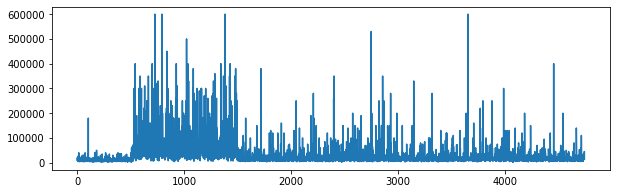

In [12]:
data.Rent.plot(kind="line",figsize=(10,3))

In [13]:
data["Floor"].value_counts()

1 out of 2         379
Ground out of 2    350
2 out of 3         312
2 out of 4         307
1 out of 3         293
                  ... 
11 out of 31         1
50 out of 75         1
18 out of 26         1
12 out of 27         1
23 out of 34         1
Name: Floor, Length: 478, dtype: int64

In [14]:
data.head(10)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
5,2022-04-29,2,7000,600,Ground out of 1,Super Area,Thakurpukur,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
6,2022-06-21,2,10000,700,Ground out of 4,Super Area,Malancha,Kolkata,Unfurnished,Bachelors,2,Contact Agent
7,2022-06-21,1,5000,250,1 out of 2,Super Area,Malancha,Kolkata,Unfurnished,Bachelors,1,Contact Agent
8,2022-06-07,2,26000,800,1 out of 2,Carpet Area,"Palm Avenue Kolkata, Ballygunge",Kolkata,Unfurnished,Bachelors,2,Contact Agent
9,2022-06-20,2,10000,1000,1 out of 3,Carpet Area,Natunhat,Kolkata,Semi-Furnished,Bachelors/Family,2,Contact Owner


**Convert Categorical Variable to Numeric in Pandas**


In [15]:
data.Floor.unique()

array(['Ground out of 2', '1 out of 3', '1 out of 2', 'Ground out of 1',
       'Ground out of 4', '1 out of 4', '1 out of 1', 'Ground out of 3',
       '2 out of 3', '4 out of 5', '2 out of 2', '2 out of 5',
       '4 out of 14', '3 out of 3', '5 out of 5', '4 out of 4',
       '7 out of 8', '2 out of 4', '3 out of 4', '1 out of 5',
       '8 out of 5', 'Ground out of 6', '2 out of 1',
       'Upper Basement out of 4', 'Ground out of 5', '3 out of 5',
       '11 out of 19', '5 out of 10', '11 out of 14',
       'Lower Basement out of 2', '2 out of 7', '4 out of 10',
       '7 out of 10', '2 out of 13', '6 out of 7', '4 out of 7',
       '14 out of 14', '43 out of 78', '2 out of 8', '13 out of 18',
       '5 out of 12', '18 out of 24', '3 out of 7', '17 out of 31',
       '11 out of 21', '7 out of 19', '14 out of 23', '9 out of 20',
       'Upper Basement out of 9', '19 out of 24', '3 out of 21',
       '1 out of 22', '8 out of 8', '6 out of 12', '4 out of 58',
       'Upper Basement o

In [16]:
data["Tenant Preferred"].unique()

array(['Bachelors/Family', 'Bachelors', 'Family'], dtype=object)

In [17]:
data['Tenant Preferred'].replace(['Bachelors/Family', 'Bachelors','Family'],
                        [0,1,2], inplace=True)

In [18]:
data["Tenant Preferred"].unique()

array([0, 1, 2])

In [19]:
data.Floor.unique()

array(['Ground out of 2', '1 out of 3', '1 out of 2', 'Ground out of 1',
       'Ground out of 4', '1 out of 4', '1 out of 1', 'Ground out of 3',
       '2 out of 3', '4 out of 5', '2 out of 2', '2 out of 5',
       '4 out of 14', '3 out of 3', '5 out of 5', '4 out of 4',
       '7 out of 8', '2 out of 4', '3 out of 4', '1 out of 5',
       '8 out of 5', 'Ground out of 6', '2 out of 1',
       'Upper Basement out of 4', 'Ground out of 5', '3 out of 5',
       '11 out of 19', '5 out of 10', '11 out of 14',
       'Lower Basement out of 2', '2 out of 7', '4 out of 10',
       '7 out of 10', '2 out of 13', '6 out of 7', '4 out of 7',
       '14 out of 14', '43 out of 78', '2 out of 8', '13 out of 18',
       '5 out of 12', '18 out of 24', '3 out of 7', '17 out of 31',
       '11 out of 21', '7 out of 19', '14 out of 23', '9 out of 20',
       'Upper Basement out of 9', '19 out of 24', '3 out of 21',
       '1 out of 22', '8 out of 8', '6 out of 12', '4 out of 58',
       'Upper Basement o

In [20]:
data["Renting Floor"] = [x.split(" out of ")[0] for x in data["Floor"].values]



In [21]:
data.head(10)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Renting Floor
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,0,2,Contact Owner,Ground
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,0,1,Contact Owner,1
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,0,1,Contact Owner,1
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,0,1,Contact Owner,1
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,1,1,Contact Owner,1
5,2022-04-29,2,7000,600,Ground out of 1,Super Area,Thakurpukur,Kolkata,Unfurnished,0,2,Contact Owner,Ground
6,2022-06-21,2,10000,700,Ground out of 4,Super Area,Malancha,Kolkata,Unfurnished,1,2,Contact Agent,Ground
7,2022-06-21,1,5000,250,1 out of 2,Super Area,Malancha,Kolkata,Unfurnished,1,1,Contact Agent,1
8,2022-06-07,2,26000,800,1 out of 2,Carpet Area,"Palm Avenue Kolkata, Ballygunge",Kolkata,Unfurnished,1,2,Contact Agent,1
9,2022-06-20,2,10000,1000,1 out of 3,Carpet Area,Natunhat,Kolkata,Semi-Furnished,0,2,Contact Owner,1


In [22]:
data["Renting Floor"].unique()

array(['Ground', '1', '2', '4', '3', '5', '7', '8', 'Upper Basement',
       '11', 'Lower Basement', '6', '14', '43', '13', '18', '17', '9',
       '19', '60', '34', '12', '26', '25', '53', '16', '10', '39', '32',
       '47', '28', '20', '15', '65', '40', '37', '22', '21', '30', '35',
       '33', '44', '41', '46', '27', '45', '48', '50', '24', '23', '29',
       '49', '36', '76'], dtype=object)

In [23]:
data['Renting Floor'].replace(['Ground', 'Upper Basement','Lower Basement'],
                        [0,-1,-2], inplace=True)

In [24]:
data.head(10)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Renting Floor
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,0,2,Contact Owner,0
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,0,1,Contact Owner,1
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,0,1,Contact Owner,1
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,0,1,Contact Owner,1
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,1,1,Contact Owner,1
5,2022-04-29,2,7000,600,Ground out of 1,Super Area,Thakurpukur,Kolkata,Unfurnished,0,2,Contact Owner,0
6,2022-06-21,2,10000,700,Ground out of 4,Super Area,Malancha,Kolkata,Unfurnished,1,2,Contact Agent,0
7,2022-06-21,1,5000,250,1 out of 2,Super Area,Malancha,Kolkata,Unfurnished,1,1,Contact Agent,1
8,2022-06-07,2,26000,800,1 out of 2,Carpet Area,"Palm Avenue Kolkata, Ballygunge",Kolkata,Unfurnished,1,2,Contact Agent,1
9,2022-06-20,2,10000,1000,1 out of 3,Carpet Area,Natunhat,Kolkata,Semi-Furnished,0,2,Contact Owner,1


In [25]:
data.drop(data[data["Floor"] == "Ground"].index, axis = 0, inplace=True)
data.drop(data[data["Floor"] == "3"].index, axis = 0, inplace=True)
data.drop(data[data["Floor"] == "1"].index, axis = 0, inplace=True)
data["Total Floor"] = [x.split(" out of ")[1] for x in data["Floor"].values]

In [26]:
data.head(10)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Renting Floor,Total Floor
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,0,2,Contact Owner,0,2
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,0,1,Contact Owner,1,3
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,0,1,Contact Owner,1,3
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,0,1,Contact Owner,1,2
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,1,1,Contact Owner,1,2
5,2022-04-29,2,7000,600,Ground out of 1,Super Area,Thakurpukur,Kolkata,Unfurnished,0,2,Contact Owner,0,1
6,2022-06-21,2,10000,700,Ground out of 4,Super Area,Malancha,Kolkata,Unfurnished,1,2,Contact Agent,0,4
7,2022-06-21,1,5000,250,1 out of 2,Super Area,Malancha,Kolkata,Unfurnished,1,1,Contact Agent,1,2
8,2022-06-07,2,26000,800,1 out of 2,Carpet Area,"Palm Avenue Kolkata, Ballygunge",Kolkata,Unfurnished,1,2,Contact Agent,1,2
9,2022-06-20,2,10000,1000,1 out of 3,Carpet Area,Natunhat,Kolkata,Semi-Furnished,0,2,Contact Owner,1,3


In [27]:
data["Posted On"].unique()

array(['2022-05-18', '2022-05-13', '2022-05-16', '2022-07-04',
       '2022-05-09', '2022-04-29', '2022-06-21', '2022-06-07',
       '2022-06-20', '2022-05-23', '2022-05-14', '2022-05-05',
       '2022-06-01', '2022-05-17', '2022-06-09', '2022-07-02',
       '2022-06-14', '2022-06-15', '2022-05-28', '2022-05-22',
       '2022-06-18', '2022-06-25', '2022-06-22', '2022-05-21',
       '2022-06-26', '2022-06-16', '2022-06-29', '2022-05-10',
       '2022-05-12', '2022-06-03', '2022-05-31', '2022-06-10',
       '2022-06-24', '2022-04-30', '2022-05-27', '2022-06-06',
       '2022-05-20', '2022-05-26', '2022-07-03', '2022-04-23',
       '2022-06-19', '2022-07-06', '2022-06-04', '2022-05-30',
       '2022-06-08', '2022-05-03', '2022-05-07', '2022-06-27',
       '2022-05-15', '2022-04-28', '2022-06-28', '2022-06-23',
       '2022-06-13', '2022-05-04', '2022-04-25', '2022-05-06',
       '2022-06-30', '2022-07-01', '2022-06-17', '2022-06-11',
       '2022-05-11', '2022-06-12', '2022-06-05', '2022-

In [28]:
data["Posted Day"] = [x.split("-")[2] for x in data["Posted On"].values]
data["Posted Month"] = [x.split("-")[1] for x in data["Posted On"].values]
data["Posted Year"] = [x.split("-")[0] for x in data["Posted On"].values]


**Feature Splitting and Scaling**

In [29]:
data.head(10)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Renting Floor,Total Floor,Posted Day,Posted Month,Posted Year
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,0,2,Contact Owner,0,2,18,05,2022
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,0,1,Contact Owner,1,3,13,05,2022
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,0,1,Contact Owner,1,3,16,05,2022
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,0,1,Contact Owner,1,2,04,07,2022
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,1,1,Contact Owner,1,2,09,05,2022
5,2022-04-29,2,7000,600,Ground out of 1,Super Area,Thakurpukur,Kolkata,Unfurnished,0,2,Contact Owner,0,1,29,04,2022
6,2022-06-21,2,10000,700,Ground out of 4,Super Area,Malancha,Kolkata,Unfurnished,1,2,Contact Agent,0,4,21,06,2022
7,2022-06-21,1,5000,250,1 out of 2,Super Area,Malancha,Kolkata,Unfurnished,1,1,Contact Agent,1,2,21,06,2022
8,2022-06-07,2,26000,800,1 out of 2,Carpet Area,"Palm Avenue Kolkata, Ballygunge",Kolkata,Unfurnished,1,2,Contact Agent,1,2,07,06,2022
9,2022-06-20,2,10000,1000,1 out of 3,Carpet Area,Natunhat,Kolkata,Semi-Furnished,0,2,Contact Owner,1,3,20,06,2022


In [30]:
data.drop(axis = 1, labels = "Posted On", inplace = True)
data.drop(axis = 1, labels = "Area Locality", inplace = True)
data.drop(axis = 1, labels = "Floor", inplace = True)

In [31]:
data.head(10)

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Renting Floor,Total Floor,Posted Day,Posted Month,Posted Year
0,2,10000,1100,Super Area,Kolkata,Unfurnished,0,2,Contact Owner,0,2,18,05,2022
1,2,20000,800,Super Area,Kolkata,Semi-Furnished,0,1,Contact Owner,1,3,13,05,2022
2,2,17000,1000,Super Area,Kolkata,Semi-Furnished,0,1,Contact Owner,1,3,16,05,2022
3,2,10000,800,Super Area,Kolkata,Unfurnished,0,1,Contact Owner,1,2,04,07,2022
4,2,7500,850,Carpet Area,Kolkata,Unfurnished,1,1,Contact Owner,1,2,09,05,2022
5,2,7000,600,Super Area,Kolkata,Unfurnished,0,2,Contact Owner,0,1,29,04,2022
6,2,10000,700,Super Area,Kolkata,Unfurnished,1,2,Contact Agent,0,4,21,06,2022
7,1,5000,250,Super Area,Kolkata,Unfurnished,1,1,Contact Agent,1,2,21,06,2022
8,2,26000,800,Carpet Area,Kolkata,Unfurnished,1,2,Contact Agent,1,2,07,06,2022
9,2,10000,1000,Carpet Area,Kolkata,Semi-Furnished,0,2,Contact Owner,1,3,20,06,2022


In [32]:
from sklearn.model_selection import train_test_split
y=data["Rent"]
X=data.drop(["Rent"],axis=1)

train_x, test_x,train_y,test_y = train_test_split(X,y, test_size = 0.4, random_state = 1, shuffle = True)

In [33]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
columntrans = ColumnTransformer(transformers=[
    ("cat", OneHotEncoder(sparse=False), ["Area Type", "City", "Furnishing Status", "Tenant Preferred", "Point of Contact"]),
    ("scaler", StandardScaler(), ["Size"])
], remainder="passthrough")
X = columntrans.fit_transform(X)
test_x = columntrans.transform(test_x)
y = y.values
test_y = test_y.values

In [34]:
data.head(10)

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Renting Floor,Total Floor,Posted Day,Posted Month,Posted Year
0,2,10000,1100,Super Area,Kolkata,Unfurnished,0,2,Contact Owner,0,2,18,05,2022
1,2,20000,800,Super Area,Kolkata,Semi-Furnished,0,1,Contact Owner,1,3,13,05,2022
2,2,17000,1000,Super Area,Kolkata,Semi-Furnished,0,1,Contact Owner,1,3,16,05,2022
3,2,10000,800,Super Area,Kolkata,Unfurnished,0,1,Contact Owner,1,2,04,07,2022
4,2,7500,850,Carpet Area,Kolkata,Unfurnished,1,1,Contact Owner,1,2,09,05,2022
5,2,7000,600,Super Area,Kolkata,Unfurnished,0,2,Contact Owner,0,1,29,04,2022
6,2,10000,700,Super Area,Kolkata,Unfurnished,1,2,Contact Agent,0,4,21,06,2022
7,1,5000,250,Super Area,Kolkata,Unfurnished,1,1,Contact Agent,1,2,21,06,2022
8,2,26000,800,Carpet Area,Kolkata,Unfurnished,1,2,Contact Agent,1,2,07,06,2022
9,2,10000,1000,Carpet Area,Kolkata,Semi-Furnished,0,2,Contact Owner,1,3,20,06,2022


# Predictive Modeling

**We use the LinearRegressio machine learning models for the dataset:**



In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model=LinearRegression().fit(X, y)

lrtrain=np.sqrt(mean_squared_error(y, model.predict(X)))
lrtest=np.sqrt(mean_squared_error(test_y, model.predict(test_x)))

print(lrtrain)
print(lrtest)

33388.36086835978
35322.88454233651
